In [ ]:
import numpy as np
from numpy.polynomial import Polynomial as P
#import plotly
#import plotly.plotly as py
#import plotly.figure_factory as ff
import matplotlib.pyplot as plt
#Integrand function
def f(x,H):
    #return (x-5)*np.exp(-(x/2-3))+H
    return np.sin(x)/x +H
#Calculates the coefficients of linear weight function.    
def findw(f,H,lower,upper,normalize):
    #Find the linear function.
    slope=(f(upper,H)-f(lower,H))/(upper-lower)
    a=slope
    b=-slope*upper+f(upper,H)
    #Normalization.
    A=(a/2)*(upper**2)+b*upper-(a/2)*(lower**2)-b*lower
    if normalize:
        a/=A
        b/=A
    return [a,b]
#Performs integration.
def integrate(f,lower,upper,N,C):
    H=C
    w=findw(f,H,lower,upper,True)    
    #Generate uniform random inputs.
    inputs=np.random.rand(N)    
    a=w[0]/2  
    b=w[1]
    c=-(a*lower**2+b*lower)
    
    SUM=0
    SUM2=0
    
    inverse_inputs=[]
    for i in inputs:
        p=[(-b-np.sqrt(b**2-4*a*(c-i)))/(2*a),(-b+np.sqrt(b**2-4*a*(c-i)))/(2*a)]
        if p[0]>=lower and p[0]<=upper:
            inverse_inputs.append(p[0])
        else :
            inverse_inputs.append(p[1])

    inverse_inputs=np.array(inverse_inputs)
    #Calculate f(inverse(x))/w(inverse(x)).
    outputsF=f(inverse_inputs,H)
    outputsW=w[0]*(inverse_inputs)+w[1]
    outputs=outputsF/outputsW
    SUM=outputs.sum()
    SUM2=(outputs*outputs).sum()
    var=SUM2/N-(SUM/N)**2
    var=var/N
    #Store generated points for variance calculation.
    Vsum=outputs.sum()
    return Vsum/N-H*(upper-lower),(upper-lower)**2*var
    
sigmas=[]
sigma=0
I=0
l=[4.6,5.2]
C=np.arange(-6,6,1)
for c in C:
    I=0
    sigma=0
    temp_sigmas=[]
    temp_results=[]
    for i in range (0,len(l)-1):
        for p in range (0,100):
            temp,temp2=integrate(f,l[i],l[i+1],1000,10**c)
            temp_sigmas.append(temp2)
            temp_results.append(temp)
        sigma+=np.mean(temp_sigmas)
        I+=np.mean(temp_results)
    sigmas.append(np.sqrt(sigma))

plt.plot(C,sigmas,'d')
plt.ylabel('Sigma')
plt.xlabel('C')
z = np.polyfit(C,sigmas,3)
p = np.poly1d(z)
plt.plot(C,p(C))
plt.show()
print(np.argmin(sigmas))


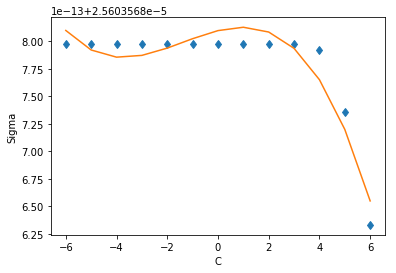

2.56035687975e-05
0.192957454749
12 2.56035686331e-05


In [28]:
def theoretical_sigma(f,lower,upper,N,C):
    
    w=findw(f,C,lower,upper,True) 
    
    flower=f(lower,C)
    fmiddle=f((lower+upper)/2,C)
    fupper=f(upper,C)
    
    wlower=w[0]*lower+w[1]
    wmiddle=w[0]*(lower+upper)/2+w[1]
    wupper=w[0]*upper+w[1]
    
    gupper=fupper/wupper
    gmiddle=fmiddle/wmiddle
    glower=flower/wlower    

    
    sigma=np.abs(0.03727*(upper-lower)**3/np.sqrt(N)*(4*(gupper-2*gmiddle+glower)/(upper-lower)**2))
    
    
    #return (upper-lower)*np.sqrt(var)
    return sigma

low=4.6
high=5.2
C=np.arange(-6,7,1)
sigmas=[]
for i in C:
    sigmas.append(theoretical_sigma(f,low,high,1000,10**i))
    
    
plt.plot(C,sigmas,'d')
plt.ylabel('Sigma')
plt.xlabel('C')
z = np.polyfit(C,sigmas,3)
p = np.poly1d(z)
plt.plot(C,p(C))
plt.show()

print(theoretical_sigma(f,low,high,1000,int(-f(low,0)/2-f(high,0)/2)))
print(-f(low,0)/2-f(high,0)/2)
print(np.argmin(sigmas),np.min(sigmas))
